In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ase.build import bulk
from ase.io import read, write
from atomrdf.structure import System
from atomrdf import KnowledgeGraph
from pyscal3 import System as PSystem

In [2]:
n = 4
print(n**3*4)
s_ase = bulk('Cu').repeat((n,n,n))
write('struct.data', s_ase, format='lammps-data', atom_style='atomic')
#sys = System.create.element.Cu(repetitions=(n,n,n))
#sys.write.file('struct.data')

256


In [3]:
kg = KnowledgeGraph()

Read with triples with atomrdf

In [6]:
%%timeit
sys = System.read.file('struct.data', format='lammps-data', graph=kg)

12.5 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Read without triples with atomrdf

In [8]:
%%timeit
sys = System.read.file('struct.data', format='lammps-data')

2.64 ms ± 77.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Read with ASE

In [10]:
%%timeit
sys = read('struct.data', format='lammps-data', style='atomic')

1.39 ms ± 68 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Tests for Cu structure with n repetitions in lammps-data format

In [11]:
n = np.array([2, 4, 7, 10, 20, 30, 50, 70, 100])
#direct read through atomrdf
time_atomrdf = np.array([2.04, 2.82, 3.94, 8.9, 50.5, 178, 670, 2090, 5530])
#read through atomrdf with triples on
time_atomrdf_triples = np.array([8.33, 13.7, 17.3, 30.2, 128, 427, 1780, 4980, 13900])
#direct read through ase
time_ase = np.array([1.17, 1.3, 3.22, 6.62, 41.1, 126, 554, 1470, 4470])

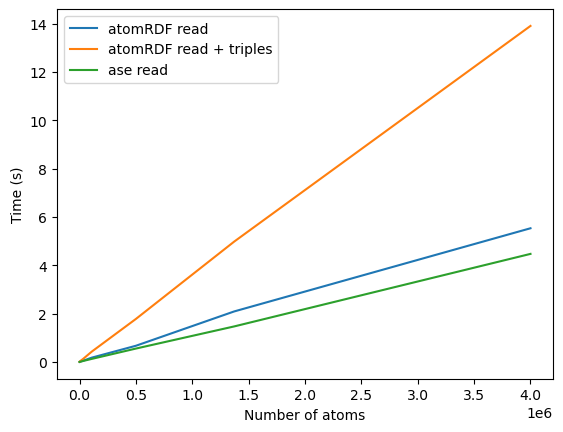

In [12]:
N = n**3*4
plt.plot(N, time_atomrdf/1000, label='atomRDF read')
plt.plot(N, time_atomrdf_triples/1000, label='atomRDF read + triples')
plt.plot(N, time_ase/1000, label='ase read')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of atoms')
plt.ylabel('Time (s)')
plt.legend()
#plt.savefig('read_time.png', bbox_inches='tight')